# Strategia regressione logistica

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from sklearn.linear_model import LogisticRegression

C:\Users\Paolo\AppData\Local\Temp\ipykernel_3124\1181301253.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [3]:
# WITH OANDA
import tpqoa
api = tpqoa.tpqoa("oandaMY.cfg")

In [4]:
# WITH IBKR
# ib.disconnect()
import pandas as pd
from ib_insync import *
util.startLoop()  # not necessary in scripts
ib = IB()
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

In [5]:
# WITH OANDA
train = api.get_history(instrument = "EUR_USD", start = "2023-07-24", end = "2023-09-24", granularity = "M5", price = "M")
# we change the column names to match IBKR
train.rename(columns={"o":"open","h":"high","l":"low","c":"close","time":"date"},inplace=True)
train.index.names = ['date']
train = train.close.to_frame()
train.head(5)

close
date                        
2024-08-25 21:00:00  1.11902
2024-08-25 21:05:00  1.11908
2024-08-25 21:10:00  1.11908
2024-08-25 21:15:00  1.11904
2024-08-25 21:20:00  1.11940

In [33]:
# WITH IBKR
train = pd.DataFrame(ib.reqHistoricalData( Forex("EURUSD"), endDateTime = "20230924 00:00:00", 
                                  barSizeSetting="5 mins", durationStr="2 M", 
                                  whatToShow= "MIDPOINT", useRTH = True, formatDate=2 )).set_index("date")
train.index=pd.to_datetime(train.index)
train = train.close.to_frame()
train.head(5)

close
date                              
2023-07-24 21:15:00+00:00  1.10645
2023-07-24 21:20:00+00:00  1.10650
2023-07-24 21:25:00+00:00  1.10655
2023-07-24 21:30:00+00:00  1.10655
2023-07-24 21:35:00+00:00  1.10660

In [34]:
train["logRet"]=np.log(train.close/train.close.shift(1))

In [35]:
train["direzione"]=np.sign(train.logRet)

In [36]:
train

close    logRet  direzione
date                                                   
2023-07-24 21:15:00+00:00  1.10645       NaN        NaN
2023-07-24 21:20:00+00:00  1.10650  0.000045        1.0
2023-07-24 21:25:00+00:00  1.10655  0.000045        1.0
2023-07-24 21:30:00+00:00  1.10655  0.000000        0.0
2023-07-24 21:35:00+00:00  1.10660  0.000045        1.0
...                            ...       ...        ...
2023-09-22 20:35:00+00:00  1.06435  0.000047        1.0
2023-09-22 20:40:00+00:00  1.06450  0.000141        1.0
2023-09-22 20:45:00+00:00  1.06450  0.000000        0.0
2023-09-22 20:50:00+00:00  1.06445 -0.000047       -1.0
2023-09-22 20:55:00+00:00  1.06560  0.001080        1.0

[12540 rows x 3 columns]

In [37]:
train.direzione.value_counts()

-1.0    5559
 1.0    5349
 0.0    1631
Name: direzione, dtype: int64

In [38]:
lags=5
colonne=[]
for lag in range(1,lags+1):
    col = "logRet"+str(lag)
    train[col]=train.logRet.shift(lag)
    colonne.append(col)
train.dropna(inplace=True)

In [39]:
train

close    logRet  direzione   logRet1   logRet2  \
date                                                                          
2023-07-24 21:45:00+00:00  1.10655 -0.000045       -1.0  0.000000  0.000045   
2023-07-24 21:50:00+00:00  1.10655  0.000000        0.0 -0.000045  0.000000   
2023-07-24 21:55:00+00:00  1.10645 -0.000090       -1.0  0.000000 -0.000045   
2023-07-24 22:00:00+00:00  1.10655  0.000090        1.0 -0.000090  0.000000   
2023-07-24 22:05:00+00:00  1.10650 -0.000045       -1.0  0.000090 -0.000090   
...                            ...       ...        ...       ...       ...   
2023-09-22 20:35:00+00:00  1.06435  0.000047        1.0  0.000094 -0.000094   
2023-09-22 20:40:00+00:00  1.06450  0.000141        1.0  0.000047  0.000094   
2023-09-22 20:45:00+00:00  1.06450  0.000000        0.0  0.000141  0.000047   
2023-09-22 20:50:00+00:00  1.06445 -0.000047       -1.0  0.000000  0.000141   
2023-09-22 20:55:00+00:00  1.06560  0.001080        1.0 -0.000047  0.000000   

                            logRet3   logRet4   logRet5  
date                                                     
2023-07-24 21:45:00+00:00  0.000000  0.000045  0.000045  
2023-07-24 21:50:00+00:00  0.000045  0.000000  0.000045  
2023-07-24 21:55:00+00:00  0.000000  0.000045  0.000000  
2023-07-24 22:00:00+00:00 -0.000045  0.000000  0.000045  
2023-07-24 22:05:00+00:00  0.000000 -0.000045  0.000000  
...                             ...       ...       ...  
2023-09-22 20:35:00+00:00 -0.000047 -0.000282  0.000094  
2023-09-22 20:40:00+00:00 -0.000094 -0.000047 -0.000282  
2023-09-22 20:45:00+00:00  0.000094 -0.000094 -0.000047  
2023-09-22 20:50:00+00:00  0.000047  0.000094 -0.000094  
2023-09-22 20:55:00+00:00  0.000141  0.000047  0.000094  

[12534 rows x 8 columns]

In [40]:

train

close    logRet  direzione   logRet1   logRet2  \
date                                                                          
2023-07-24 21:45:00+00:00  1.10655 -0.000045       -1.0  0.000000  0.000045   
2023-07-24 21:50:00+00:00  1.10655  0.000000        0.0 -0.000045  0.000000   
2023-07-24 21:55:00+00:00  1.10645 -0.000090       -1.0  0.000000 -0.000045   
2023-07-24 22:00:00+00:00  1.10655  0.000090        1.0 -0.000090  0.000000   
2023-07-24 22:05:00+00:00  1.10650 -0.000045       -1.0  0.000090 -0.000090   
...                            ...       ...        ...       ...       ...   
2023-09-22 20:35:00+00:00  1.06435  0.000047        1.0  0.000094 -0.000094   
2023-09-22 20:40:00+00:00  1.06450  0.000141        1.0  0.000047  0.000094   
2023-09-22 20:45:00+00:00  1.06450  0.000000        0.0  0.000141  0.000047   
2023-09-22 20:50:00+00:00  1.06445 -0.000047       -1.0  0.000000  0.000141   
2023-09-22 20:55:00+00:00  1.06560  0.001080        1.0 -0.000047  0.000000   

                            logRet3   logRet4   logRet5  
date                                                     
2023-07-24 21:45:00+00:00  0.000000  0.000045  0.000045  
2023-07-24 21:50:00+00:00  0.000045  0.000000  0.000045  
2023-07-24 21:55:00+00:00  0.000000  0.000045  0.000000  
2023-07-24 22:00:00+00:00 -0.000045  0.000000  0.000045  
2023-07-24 22:05:00+00:00  0.000000 -0.000045  0.000000  
...                             ...       ...       ...  
2023-09-22 20:35:00+00:00 -0.000047 -0.000282  0.000094  
2023-09-22 20:40:00+00:00 -0.000094 -0.000047 -0.000282  
2023-09-22 20:45:00+00:00  0.000094 -0.000094 -0.000047  
2023-09-22 20:50:00+00:00  0.000047  0.000094 -0.000094  
2023-09-22 20:55:00+00:00  0.000141  0.000047  0.000094  

[12534 rows x 8 columns]

In [41]:
lm2023 = LogisticRegression(multi_class="ovr",C=100000,max_iter=100000)
# multi_class set = ovr permette più di due valori sulla variabile dipendente

# OPPURE
# train.direzione[train.direzione==0]=-1
# lm2023 = LogisticRegression(C=100000,max_iter=100000)


In [42]:
lm2023.fit(train[colonne],train.direzione)

LogisticRegression(C=100000, max_iter=100000, multi_class='ovr')

In [43]:
train["predicted"]=lm2023.predict(train[colonne])

In [44]:
train.head(30)

close    logRet  direzione   logRet1   logRet2  \
date                                                                          
2023-07-24 21:45:00+00:00  1.10655 -0.000045       -1.0  0.000000  0.000045   
2023-07-24 21:50:00+00:00  1.10655  0.000000        0.0 -0.000045  0.000000   
2023-07-24 21:55:00+00:00  1.10645 -0.000090       -1.0  0.000000 -0.000045   
2023-07-24 22:00:00+00:00  1.10655  0.000090        1.0 -0.000090  0.000000   
2023-07-24 22:05:00+00:00  1.10650 -0.000045       -1.0  0.000090 -0.000090   
2023-07-24 22:10:00+00:00  1.10655  0.000045        1.0 -0.000045  0.000090   
2023-07-24 22:15:00+00:00  1.10655  0.000000        0.0  0.000045 -0.000045   
2023-07-24 22:20:00+00:00  1.10650 -0.000045       -1.0  0.000000  0.000045   
2023-07-24 22:25:00+00:00  1.10650  0.000000        0.0 -0.000045  0.000000   
2023-07-24 22:30:00+00:00  1.10640 -0.000090       -1.0  0.000000 -0.000045   
2023-07-24 22:35:00+00:00  1.10630 -0.000090       -1.0 -0.000090  0.000000   
2023-07-24 22:40:00+00:00  1.10645  0.000136        1.0 -0.000090 -0.000090   
2023-07-24 22:45:00+00:00  1.10645  0.000000        0.0  0.000136 -0.000090   
2023-07-24 22:50:00+00:00  1.10625 -0.000181       -1.0  0.000000  0.000136   
2023-07-24 22:55:00+00:00  1.10625  0.000000        0.0 -0.000181  0.000000   
2023-07-24 23:00:00+00:00  1.10615 -0.000090       -1.0  0.000000 -0.000181   
2023-07-24 23:05:00+00:00  1.10620  0.000045        1.0 -0.000090  0.000000   
2023-07-24 23:10:00+00:00  1.10610 -0.000090       -1.0  0.000045 -0.000090   
2023-07-24 23:15:00+00:00  1.10620  0.000090        1.0 -0.000090  0.000045   
2023-07-24 23:20:00+00:00  1.10645  0.000226        1.0  0.000090 -0.000090   
2023-07-24 23:25:00+00:00  1.10640 -0.000045       -1.0  0.000226  0.000090   
2023-07-24 23:30:00+00:00  1.10625 -0.000136       -1.0 -0.000045  0.000226   
2023-07-24 23:35:00+00:00  1.10625  0.000000        0.0 -0.000136 -0.000045   
2023-07-24 23:40:00+00:00  1.10620 -0.000045       -1.0  0.000000 -0.000136   
2023-07-24 23:45:00+00:00  1.10625  0.000045        1.0 -0.000045  0.000000   
2023-07-24 23:50:00+00:00  1.10625  0.000000        0.0  0.000045 -0.000045   
2023-07-24 23:55:00+00:00  1.10630  0.000045        1.0  0.000000  0.000045   
2023-07-25 00:00:00+00:00  1.10650  0.000181        1.0  0.000045  0.000000   
2023-07-25 00:05:00+00:00  1.10635 -0.000136       -1.0  0.000181  0.000045   
2023-07-25 00:10:00+00:00  1.10655  0.000181        1.0 -0.000136  0.000181   

                            logRet3   logRet4   logRet5  predicted  
date                                                                
2023-07-24 21:45:00+00:00  0.000000  0.000045  0.000045       -1.0  
2023-07-24 21:50:00+00:00  0.000045  0.000000  0.000045       -1.0  
2023-07-24 21:55:00+00:00  0.000000  0.000045  0.000000       -1.0  
2023-07-24 22:00:00+00:00 -0.000045  0.000000  0.000045       -1.0  
2023-07-24 22:05:00+00:00  0.000000 -0.000045  0.000000       -1.0  
2023-07-24 22:10:00+00:00 -0.000090  0.000000 -0.000045       -1.0  
2023-07-24 22:15:00+00:00  0.000090 -0.000090  0.000000       -1.0  
2023-07-24 22:20:00+00:00 -0.000045  0.000090 -0.000090       -1.0  
2023-07-24 22:25:00+00:00  0.000045 -0.000045  0.000090       -1.0  
2023-07-24 22:30:00+00:00  0.000000  0.000045 -0.000045       -1.0  
2023-07-24 22:35:00+00:00 -0.000045  0.000000  0.000045       -1.0  
2023-07-24 22:40:00+00:00  0.000000 -0.000045  0.000000       -1.0  
2023-07-24 22:45:00+00:00 -0.000090  0.000000 -0.000045       -1.0  
2023-07-24 22:50:00+00:00 -0.000090 -0.000090  0.000000       -1.0  
2023-07-24 22:55:00+00:00  0.000136 -0.000090 -0.000090       -1.0  
2023-07-24 23:00:00+00:00  0.000000  0.000136 -0.000090       -1.0  
2023-07-24 23:05:00+00:00 -0.000181  0.000000  0.000136       -1.0  
2023-07-24 23:10:00+00:00  0.000000 -0.000181  0.000000       -1.0  
2023-07-24 23:15:00+00:00 -0.000090  0.000000 -0.000181       -1.0  
2023-07-24 23:20:00+00:00  0.000045 -0.000090  0.00

In [45]:
hits=train.direzione==train.predicted

In [46]:
hits.sum()/len(hits)

0.44351364289133555

<Axes: xlabel='date'>

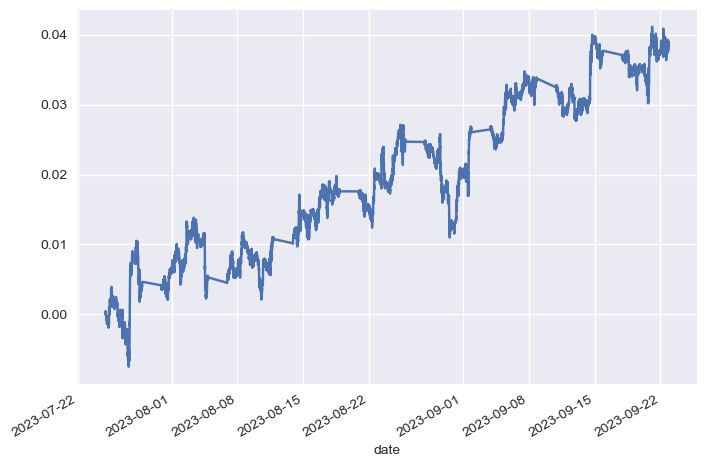

In [47]:
(train.predicted*train.logRet).cumsum().plot()

In [48]:
# # WITH OANDA
# test = api.get_history(instrument = "EUR_USD", start = "2024-07-24", end = "2024-09-24", granularity = "M5", price = "M")
# # we change the column names to match IBKR
# test.rename(columns={"o":"open","h":"high","l":"low","c":"close","time":"date"},inplace=True)
# test.index.names = ['date']
# test = test.close.to_frame()
# test.head(5)

# WITH IBKR
test = pd.DataFrame(ib.reqHistoricalData( Forex("EURUSD"), endDateTime = "20240924 00:00:00", 
                                  barSizeSetting="5 mins", durationStr="2 M", 
                                  whatToShow= "MIDPOINT", useRTH = True, formatDate=2 )).set_index("date")
test.index=pd.to_datetime(test.index)
test = test.close.to_frame()
test.head(5)

test["logRet"]=np.log(test.close/test.close.shift(1))
lags=5
colonne=[]
for lag in range(1,lags+1):
    col = "logRet"+str(lag)
    test[col]=test.logRet.shift(lag)
    colonne.append(col)
test.dropna(inplace=True)

# attenzione che NON RIFACCIO il modello

test["predicted"]=np.sign(lm2023.predict(test[colonne])) 
test["transazioni"]= abs(test.predicted-test.predicted.shift(1))

<Axes: xlabel='date'>

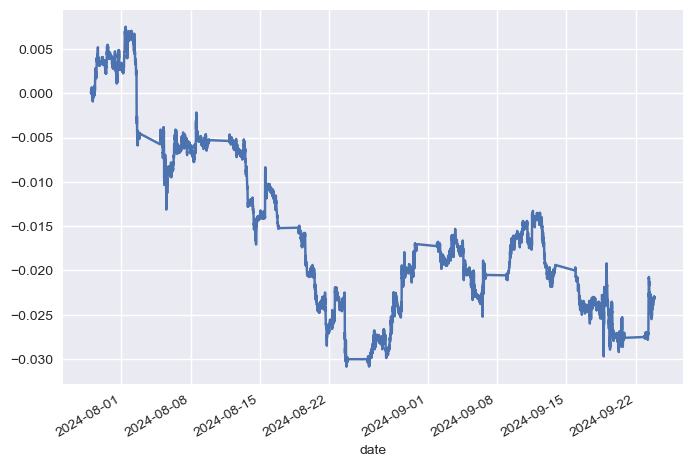

In [49]:
(test.predicted*test.logRet).cumsum().plot()

In [50]:
comm=0.0
spread=0.00002/test.close.mean() 
# attenzione che 0.00011 è in dollari e df.close è in dollari. Ottimo. 
# Controllare sempre che i termini del rapporto usino la stessa unità di misura!
test["transazioni"]= abs(test.predicted-test.predicted.shift(1))

<Axes: xlabel='date'>

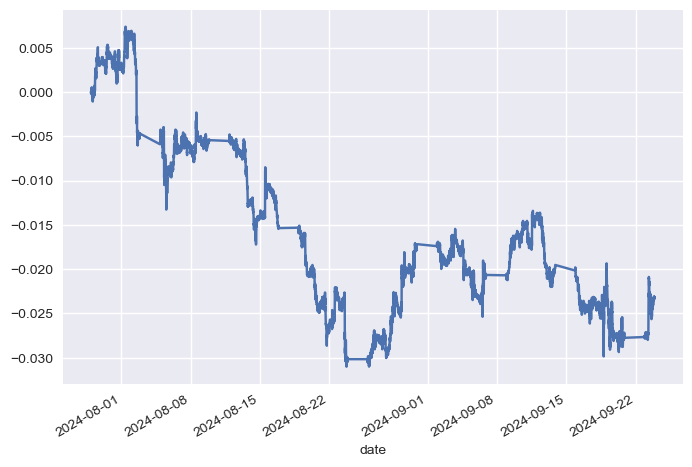

In [51]:
(test.predicted*test.logRet-test.transazioni*(comm+spread/2)).cumsum().plot()

In [52]:
ib.disconnect()